#  CSTR fault detection

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.io
import matplotlib.image as mpimg

(-0.5, 1096.5, 551.5, -0.5)

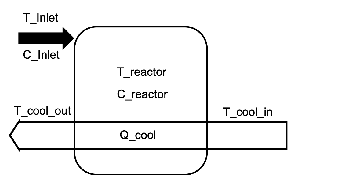

In [38]:
cstr= mpimg.imread('cstr.png')
plt.imshow(cstr)
plt.axis('off')

In [23]:
mat = scipy.io.loadmat('cstr_fault_time_series.mat')


In [27]:
fault_label=mat["fault_labels"].flatten()
data = pd.DataFrame({'C_inlet':mat["data"][:, 0], 'T_inlet':mat["data"][:, 1] \
                     ,'C_reactor':mat["data"][:, 2], 'T_reactor':mat["data"][:, 3] \
                     ,'Q_cool':mat["data"][:, 4], 'T_cool_in':mat["data"][:, 5]\
                     ,'T_cool_out':mat["data"][:, 6],'fault':fault_label
                    
                    })
data.head()

,C_inlet,C_reactor,Q_cool,T_cool_in,T_cool_out,T_inlet,T_reactor,fault
0,1.027647,0.099224,148.841248,348.638761,416.686204,350.360361,430.879667,0
1,1.027779,0.094646,157.013774,348.713451,417.987404,350.299300,432.911189,0
2,1.026808,0.108838,154.560242,349.188551,414.600037,349.971868,429.661746,0
3,1.026215,0.097684,157.220063,348.729069,416.656083,350.640629,432.256645,0
4,1.026132,0.100689,162.379105,348.849656,416.179071,350.595431,431.304828,0


In [78]:
normal=data[data['fault']==0]
normal = normal.drop('fault', 1)

In [93]:
corr = normal.corr()
corr.style.background_gradient(cmap=cm.plasma)

,C_inlet,C_reactor,Q_cool,T_cool_in,T_cool_out,T_inlet,T_reactor
C_inlet,1,0.337727,0.865872,-0.103169,-0.430025,-0.14273,0.0325988
C_reactor,0.337727,1,0.160318,-0.0381804,-0.958128,-0.0298583,-0.904093
Q_cool,0.865872,0.160318,1,0.143554,-0.30809,0.0522386,0.19717
T_cool_in,-0.103169,-0.0381804,0.143554,1,0.0407638,0.0529842,-0.00447289
T_cool_out,-0.430025,-0.958128,-0.30809,0.0407638,1,-0.0336354,0.85825
T_inlet,-0.14273,-0.0298583,0.0522386,0.0529842,-0.0336354,1,-0.0174267
T_reactor,0.0325988,-0.904093,0.19717,-0.00447289,0.85825,-0.0174267,1


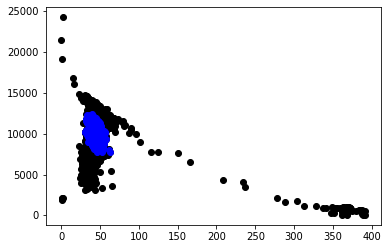

In [73]:

plt.scatter(data['T_reactor']*data['C_reactor'],data['Q_cool']*(data['T_cool_out'] -data['T_cool_in']),c="k")
plt.scatter(normal['T_reactor']*normal['C_reactor'],normal['Q_cool']*(normal['T_cool_out'] -normal['T_cool_in']),c="b")